# Introduction

I'm trying to understand why `DMCWingWorks` sometimes leaves particles inside the airfoil at the end of a collision-resolution phase.  This behavior still manifests as of `main` revision, `6afe8e2fd1bc8baf68f565966ac541821a38998f`.

The geometry below was generated by diagnostic messages added to the `DMCWingWorks` source code.

`foil` contains the scaled vertex coordinates of the airfoil polygon.

`inside0` is an example of a particle position that lies inside the polygon, as detected in `SATPolyCollision.collisionNormal`.

`inside1` is the position of the particle after the code tries to move the particle to the surface of the polygon; its value is printed after the code determines that the moved particle is *still* inside the polygon.

`inside2` is the position of the particle after the code (reflecting my mistaken belief that it moved the particle in the wrong direction) moves the particle in the opposite direction to that used for `inside1` - and after the code determines that the point is ***still*** inside the polygon.

The upshot of all of these diagnostics is that the code:
* was computing the correct displacement direction
* was miscalculating the displacement magnitude


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
foil = [
    (21.61566625583794, 30.582579917106106),
    (22.285935920085585, 31.40518764019059),
    (22.86876914734008, 31.675743426771763),
    (23.998393101103794, 31.98929160626099),
    (25.107325989624854, 32.17220154123417),
    (26.205579618665837, 32.28768528548939),
    (28.378058542917618, 32.36694384488441),
    (30.528511494491735, 32.307135885923635),
    (32.662945556845735, 32.14618864088592),
    (34.78403054484963, 31.90095865745075),
    (38.99282783498218, 31.199791844586784),
    (43.16958734667449, 30.296346459568934),
    (47.32498833940664, 29.25804869311516),
    (51.46036572061364, 28.09332681906521),
    (55.57905675888301, 26.823251522018445),
    (59.68172890793227, 25.45203693889474),
    (61.72605671842308, 24.722181209674225),
    (63.765712352891384, 23.9628265220146),
    (63.748358556236255, 23.85325896209791),
    (61.61792921618728, 24.039491028654865),
    (59.48816732985583, 24.22993723213169),
    (55.228643557192896, 24.61082963908534),
    (50.97178959939998, 25.008578593718475),
    (46.71627054904209, 25.41475582219136),
    (42.463421313554214, 25.837789598343736),
    (38.2185815226764, 26.31139301753458),
    (33.98308608384365, 26.843994353603644),
    (31.869343086732307, 27.135579843157412),
    (29.76160717307851, 27.46509256499003),
    (27.663215611469777, 27.853603203700867),
    (25.57950803164616, 28.3348248546489),
    (24.545329959485656, 28.62389825470145),
    (23.521831146805233, 28.980397845471963),
    (22.517688491932457, 29.459107406918783),
    (22.032303507433692, 29.803815610639006),
]
foil.append(foil[0])
x_foil = [p[0] for p in foil]
y_foil = [p[1] for p in foil]

In [3]:
displacement_to_nearest = (-0.43033392468918424, -0.9026697697727578)
overlap = 1.2738855345064835
inside0 = (23.25846245734957, 30.378718758110857)
inside1 = (22.828128532660386, 29.4760489883381)
# Still Inside!
inside2 = (23.688796382038753, 31.281388527883614)
nearest_edge = [(23.521831146805233, 28.980397845471963), (22.517688491932457, 29.459107406918783)]

In [4]:
xsqr = displacement_to_nearest[0]**2
ysqr = displacement_to_nearest[1]**2
dmag = math.sqrt(xsqr + ysqr)
dmag

1.0

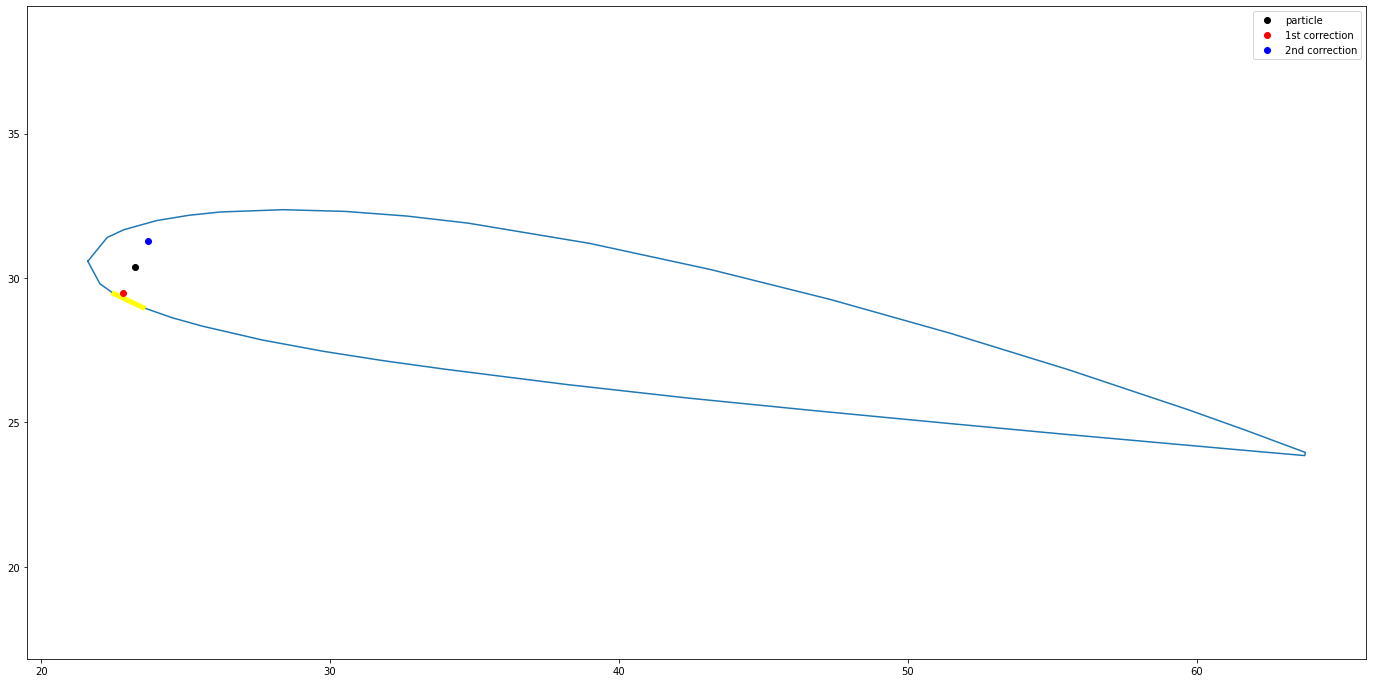

In [19]:
fig = plt.figure(figsize=[24, 12])
plt.axis("equal")
plt.plot(x_foil, y_foil)

if nearest_edge is not None:
    ne = nearest_edge
    nex = [p[0] for p in ne]
    ney = [p[1] for p in ne]
    plt.plot(nex, ney, color="yellow", linewidth=5)

plt.plot(inside0[0], inside0[1], "ko", label="particle")
plt.plot(inside1[0], inside1[1], "ro", label="1st correction")
plt.plot(inside2[0], inside2[1], "bo", label="2nd correction")
plt.legend()
plt.show()